In [256]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from config import api_key
from sklearn import preprocessing

#api_key = "4a60fcfe3a762ea4e4d9276f8944aa76"

In [257]:
# Total Petroleum and Other Liquids Product Supplied, Annual
petroleum_url = "http://api.eia.gov/series/?api_key=" + api_key + "&series_id=STEO.PATCPUSX.A"

In [258]:
print(requests.get(petroleum_url))

<Response [200]>


In [259]:
response = requests.get(petroleum_url).json()

In [260]:
# print(json.dumps(response, indent=2, sort_keys=True))

In [261]:
# Create lists to determine x and y axis for graphs
years = []
petroleum_consumption = []

# Loop through Petroleum & Other Liquids API to call data being measured
for x in response["series"][0]["data"]:
    years.append(x[0])
    petroleum_consumption.append(x[1])
    
#values = response["series"][0]["data"][1]
years  = years[::-1]
petroleum = petroleum_consumption[::-1]

In [262]:
# Loop through to calculate the annual percent change
i = 0
percent_change_petro = []
for x in petroleum:
    if(i == 0):
        percent_change_petro.append(0)
    else:
        percent_change_petro.append( (x - petroleum[i-1])/ petroleum[i-1] * 100)
    i += 1

In [263]:
# Create DataFrame displaying annual percent change
petroleum_consumption_mmbpd_df = pd.DataFrame({
    'Year': years,
    'Oil (mmbpd)': petroleum,
    '% Change': percent_change_petro
})
petroleum_consumption_mmbpd_df.set_index("Year").head()

,Oil (mmbpd),% Change
Year,,
1990,16.989137,0.000000
1991,16.713847,-1.620390
1992,17.032224,1.904872
1993,17.236999,1.202279
1994,17.718979,2.796196


In [264]:
# Calculate the Average Change over thirty years of consumption data
petroleum_consumption_mmbpd_df.mean()

Year           6.419997e+121
Oil (mmbpd)     1.920080e+01
% Change        7.122755e-01
dtype: float64

In [312]:
# Find minimum and maximum emissions for petroleum and other liquid fuels
min_consumption_value = petroleum_consumption_mmbpd_df["Oil (mmbpd)"].min()
min_consumption_year = int(petroleum_consumption_mmbpd_df[petroleum_consumption_mmbpd_df["Oil (mmbpd)"]==min_consumption_value].Year)
max_consumption_value = petroleum_consumption_mmbpd_df["Oil (mmbpd)"].max()
max_consumption_year = int(petroleum_consumption_mmbpd_df[petroleum_consumption_mmbpd_df["Oil (mmbpd)"]==max_consumption_value].Year)

print(f"The least amount of oil consumed in the US was in {int(min_consumption_year)} with {min_consumption_value} million barrels per day.")
print(f"{int(max_consumption_year)} is projected to have the highest level of petroleum consumption at approximately {max_consumption_value} million barrels per day.")

max_petro_consumption_delta= petroleum_consumption_mmbpd_df["% Change"].max()
max_petro_consumption_year= int(petroleum_consumption_mmbpd_df[petroleum_consumption_mmbpd_df["% Change"]==max_petro_consumption_delta].Year)
min_petro_consumption_delta = petroleum_consumption_mmbpd_df["% Change"].min()
min_petro_consumption_year = int(petroleum_consumption_mmbpd_df[petroleum_consumption_mmbpd_df["% Change"]==min_petro_consumption_delta].Year)

print(f"The greatest percent increase in US Energy Consumption of petroleum was {max_petro_consumption_delta}% in {max_petro_consumption_year}.")
print(f"The greatest percent decrease in US Energy Consumption of petroleum was {min_petro_consumption_delta}% in {min_petro_consumption_year}.")
# # find the total petroleum and other liquid fuels emissions
# total_emissions = pt_emissions_df["Petroleum Emissions"].sum()

# # find the difference between most and least petroleum emissions
# emissions_change = (max_emissions_value - min_emissions_value)

# #find the percentage change from lowest year to highest year

# print(f"The least amount of oil consumed in the US was in {int(min_consumption_year)} with {min_consumption_value} million barrels per day.")
# print(f"The most amount of oil consumed in the US will be in {int(max_consumption_year)} with {max_consumption_value} million barrels per day.")
# print(f"The total emissions from petroleum and other liquid fuels is {total_emissions} million metric tons.")
# print(f"The difference in petroleum emissions from 1990 and 2020 is {emissions_change} million metric tons.")
# print(f"The percentage change in petroleum emissions from the lowest year to highest year is {petroleum_percent_change}%")

The least amount of oil consumed in the US was in 1991 with 16.713846896 million barrels per day.
2020 is projected to have the highest level of petroleum consumption at approximately 21.037267486 million barrels per day.
The greatest percent increase in US Energy Consumption of petroleum was 3.481809794851699% in 2004.
The greatest percent decrease in US Energy Consumption of petroleum was -5.717569403702996% in 2008.


In [266]:
#  Export file as a CSV, without the Pandas index, but with the header
petroleum_consumption_mmbpd_df.to_csv("resources/PetroleumConsumption.csv", index=True, header=True)

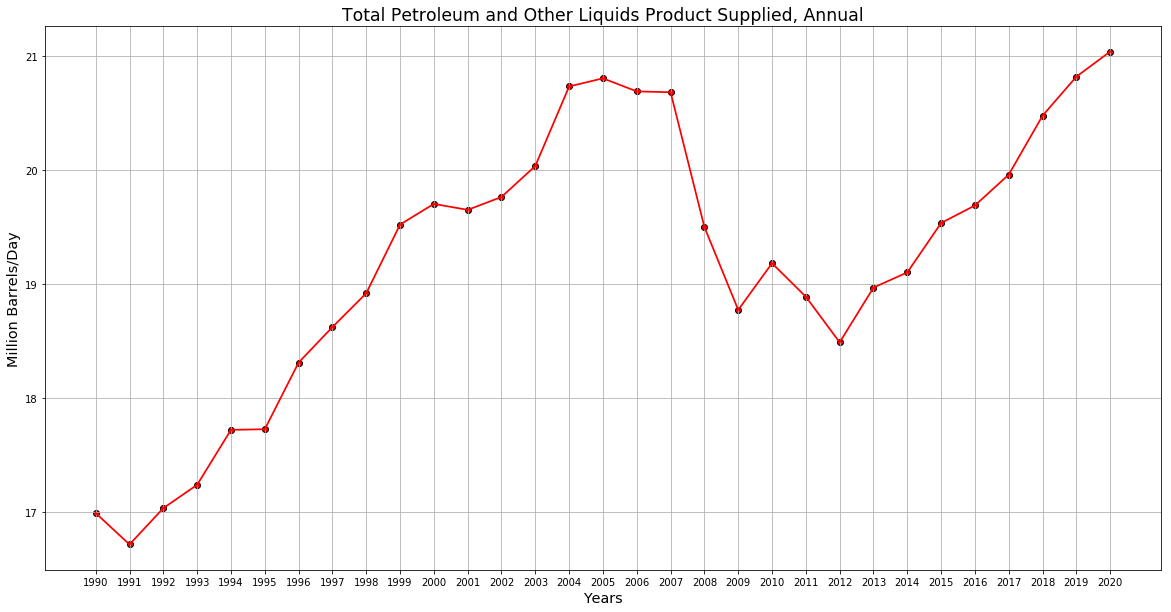

In [267]:
# Total Petroleum and Other Liquids Product Supplied, Annual
plt.figure(figsize=(20,10))

# Create a visual for the data
plt.scatter(years, petroleum, color="red", edgecolors="black")
plt.plot(years, petroleum, linewidth=1.75, color="red")
plt.title("Total Petroleum and Other Liquids Product Supplied, Annual", fontsize="xx-large")
plt.ylabel("Million Barrels/Day", fontsize="x-large")
plt.xlabel("Years", fontsize="x-large")
plt.grid(True)

# Save Figure
plt.savefig("output/US Petroleum Consumption.png")

# display the figure
plt.show()

In [268]:
# US Natural Gas Consumption, Annual
natural_gas_url = "http://api.eia.gov/series/?api_key=" + api_key + "&series_id=STEO.NGTCPUS.A"

In [269]:
print(requests.get(natural_gas_url))

<Response [200]>


In [270]:
response = requests.get(natural_gas_url).json()

In [271]:
# print(json.dumps(response, indent=2, sort_keys=True))

In [272]:
# US Natural Gas Consumption, Annual
# Create lists to determine x and y axis for graphs
years = []
natural_gas_consumption = []

# Loop through Natural Gas API to call data being measured
for x in response["series"][0]["data"]:
    years.append(x[0])
    natural_gas_consumption.append(x[1])
    
#values = response["series"][0]["data"][1]
years  = years[::-1]
natural_gas = natural_gas_consumption[::-1]

In [273]:
# Loop through to calculate the annual percent change
i = 0
percent_change_natgas = []
for x in natural_gas:
    if(i == 0):
        percent_change_natgas.append(0)
    else:
        percent_change_natgas.append( (x - natural_gas[i-1])/ natural_gas[i-1] * 100)
    i += 1
    
# percent_change_natgas"% Change"=percent_change_natgas"% Change".map("${:,.2f}".format)

In [274]:
# Determine year to year percent change
ng_consumption_bcf_df = pd.DataFrame({
    'Year': years,
    'NG (bcf/day)': natural_gas,
    '% Change': percent_change_natgas
})
ng_consumption_bcf_df.set_index("Year").head()

,NG (bcf/day),% Change
Year,,
1990,52.530288,0.000000
1991,53.594703,2.026289
1992,55.268382,3.122845
1993,56.958472,3.057969
1994,58.211229,2.199421


In [275]:
# ng_consumption_bcf_df"% Change"=ng_consumption_bcf_df"% Change".map("${:,.2f}".format)

In [276]:
# calculate average percent change over thirty years
ng_consumption_bcf_df.mean()

Year            6.419997e+121
NG (bcf/day)     6.523577e+01
% Change         1.548432e+00
dtype: float64

In [313]:
# Find minimum and maximum emissions for natural gas
min_ngconsumption_value = ng_consumption_bcf_df["NG (bcf/day)"].min()
min_ngconsumption_year = int(ng_consumption_bcf_df[ng_consumption_bcf_df["NG (bcf/day)"]==min_ngconsumption_value].Year)
max_ngconsumption_value = ng_consumption_bcf_df["NG (bcf/day)"].max()
max_ngconsumption_year = int(ng_consumption_bcf_df[ng_consumption_bcf_df["NG (bcf/day)"]==max_ngconsumption_value].Year)

print(f"The least amount of natural gas consumed in the US was in {int(min_ngconsumption_year)} with {min_ngconsumption_value} billion cubic feet per day.")
print(f"{int(max_ngconsumption_year)} is projected to have the highest level of natural gas consumption at approximately {max_ngconsumption_value} billion cubic feet/day.")

# Find minimum and maximum annual percent change for US coal consumption
max_ng_consumption_delta= ng_consumption_bcf_df["% Change"].max()
max_ng_consumption_year= int(ng_consumption_bcf_df[ng_consumption_bcf_df["% Change"]==max_ng_consumption_delta].Year)
min_ng_consumption_delta = ng_consumption_bcf_df["% Change"].min()
min_ng_consumption_year = int(ng_consumption_bcf_df[ng_consumption_bcf_df["% Change"]==min_ng_consumption_delta].Year)

print(f"The greatest percent increase in US Energy Consumption of natural gas was {max_ng_consumption_delta}% in {max_ng_consumption_year}.")
print(f"The greatest percent decrease in US Energy Consumption of natural gas was {min_ng_consumption_delta}% in {min_ng_consumption_year}.")

The least amount of natural gas consumed in the US was in 1990 with 52.530287689 billion cubic feet per day.
2020 is projected to have the highest level of natural gas consumption at approximately 83.564262432 billion cubic feet/day.
The greatest percent increase in US Energy Consumption of natural gas was 9.909164713281468% in 2018.
The greatest percent decrease in US Energy Consumption of natural gas was -4.438370577246055% in 2001.


In [278]:
#  Export file as a CSV, without the Pandas index, but with the header
ng_consumption_bcf_df.to_csv("resources/NaturalGasConsumption.csv", index=False, header=True)

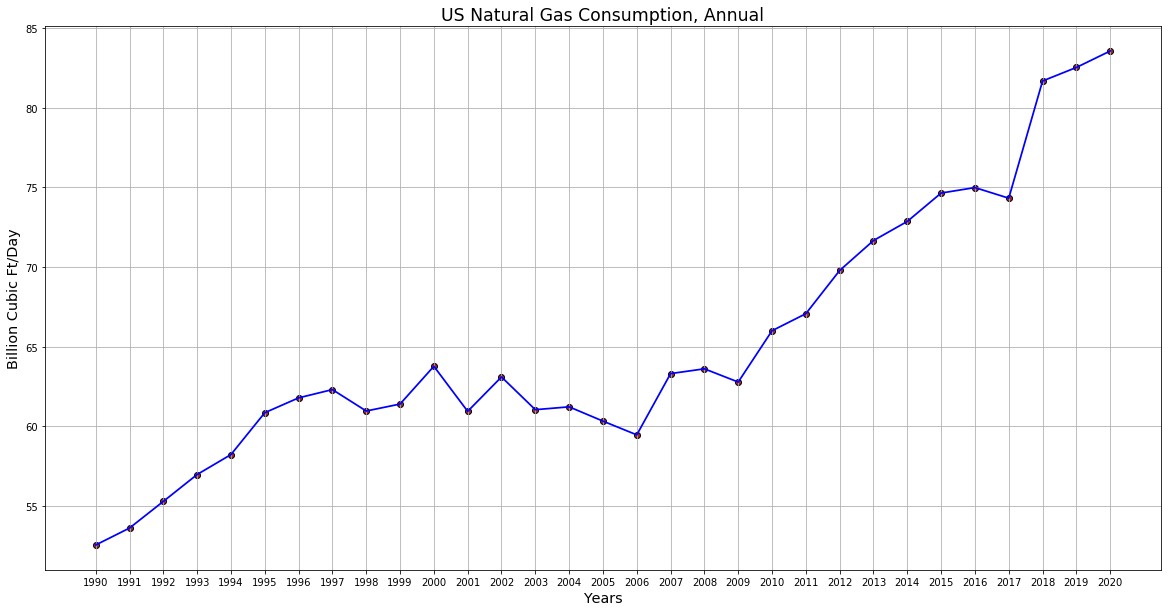

In [279]:
# Set the size of the figure to fit 30 years of data
plt.figure(figsize=(20,10))

# Create a visual for the data
plt.scatter(years, natural_gas, color="brown", edgecolors="black")
plt.plot(years, natural_gas, linewidth=1.75, color="blue")
plt.title("US Natural Gas Consumption, Annual", fontsize="xx-large")
plt.ylabel("Billion Cubic Ft/Day", fontsize="x-large")
plt.xlabel("Years", fontsize="x-large")
plt.grid(True)

# Save Figure
plt.savefig("output/US Natural Gas Consumption.png")

# display the figure
plt.show()

In [280]:
# US Total Coal Supply, Annual
coal_url = "http://api.eia.gov/series/?api_key=" + api_key + "&series_id=STEO.CLTSPUS_TON.A"

In [281]:
print(requests.get(coal_url))

<Response [200]>


In [282]:
response = requests.get(coal_url).json()

In [283]:
# print(json.dumps(response, indent=2, sort_keys=True))

In [284]:
# US Total Coal Supply, Annual
# Create lists to determine x and y axis for graphs
years = []
coal_supply = []

# Loop through Natural Gas API to call data being measured
for x in response["series"][0]["data"]:
    years.append(x[0])
    coal_supply.append(x[1])
    
#values = response["series"][0]["data"][1]
years  = years[::-1]
coal = coal_supply[::-1]

In [285]:
# Loop through to calculate the annual percent change
i = 0
percent_change_coal = []
for x in coal:
    if(i == 0):
        percent_change_coal.append(0)
    else:
        percent_change_coal.append( (x - coal[i-1])/ coal[i-1] * 100)
    i += 1

In [286]:
# Determine year to year percent change
coal_consumption_mst_df = pd.DataFrame({
    'Year': years,
    'coal (MMSt)': coal,
    '% Change': percent_change_coal
})
coal_consumption_mst_df.set_index("Year").head()

,coal (MMSt),% Change
Year,,
1990,902.768744,0.000000
1991,895.303788,-0.826896
1992,908.113844,1.430806
1993,939.165111,3.419314
1994,955.626226,1.752739


In [287]:
# Calculate average percent change
coal_consumption_mst_df.mean()

Year           6.419997e+121
coal (MMSt)     9.557265e+02
% Change       -1.200559e+00
dtype: float64

In [317]:
# Find minimum and maximum values for US coal consumption
min_coal_consumption_value = coal_consumption_mst_df["coal (MMSt)"].min()
min_coal_consumption_year = int(coal_consumption_mst_df[coal_consumption_mst_df["coal (MMSt)"]==min_coal_consumption_value].Year)
max_coal_consumption_value = coal_consumption_mst_df["coal (MMSt)"].max()
max_coal_consumption_year = int(coal_consumption_mst_df[coal_consumption_mst_df["coal (MMSt)"]==max_coal_consumption_value].Year)

print(f"The most amount of coal consumed in the US was in {int(max_coal_consumption_year)} with {max_coal_consumption_value} million short tons.")
print(f"{int(min_coal_consumption_year)} is projected to be the year the US consumes the least amount of coal, approximated at {min_coal_consumption_value} million shot tons.")

# Find minimum and maximum annual percent change for US coal consumption
max_coal_consumption_delta= coal_consumption_mst_df["% Change"].max()
max_coal_consumption_year= int(coal_consumption_mst_df[coal_consumption_mst_df["% Change"]==max_coal_consumption_delta].Year)
min_coal_consumption_delta = coal_consumption_mst_df["% Change"].min()
min_coal_consumption_year = int(coal_consumption_mst_df[coal_consumption_mst_df["% Change"]==min_coal_consumption_delta].Year)

print(f"The greatest percent increase in US Energy Consumption of coal was in {max_coal_consumption_year} with {max_coal_consumption_delta}%.")
print(f"The greatest percent decrease in US Energy Consumption of coal was in {min_coal_consumption_year} with {min_coal_consumption_delta}%.")

The most amount of coal consumed in the US was in 2005 with 1135.06992 million short tons.
2020 is projected to be the year the US consumes the least amount of coal, approximated at 599.21462 million shot tons.
The greatest percent increase in US Energy Consumption of coal was in 2000 with 4.759135645261141%.
The greatest percent decrease in US Energy Consumption of coal was in 2015 with -13.486454370361592%.


In [318]:

coal_consumption_combined_df = pd.DataFrame({})

In [319]:
#  Export file as a CSV, without the Pandas index, but with the header
coal_consumption_mst_df.to_csv("resources/CoalConsumption.csv", index=True, header=True)

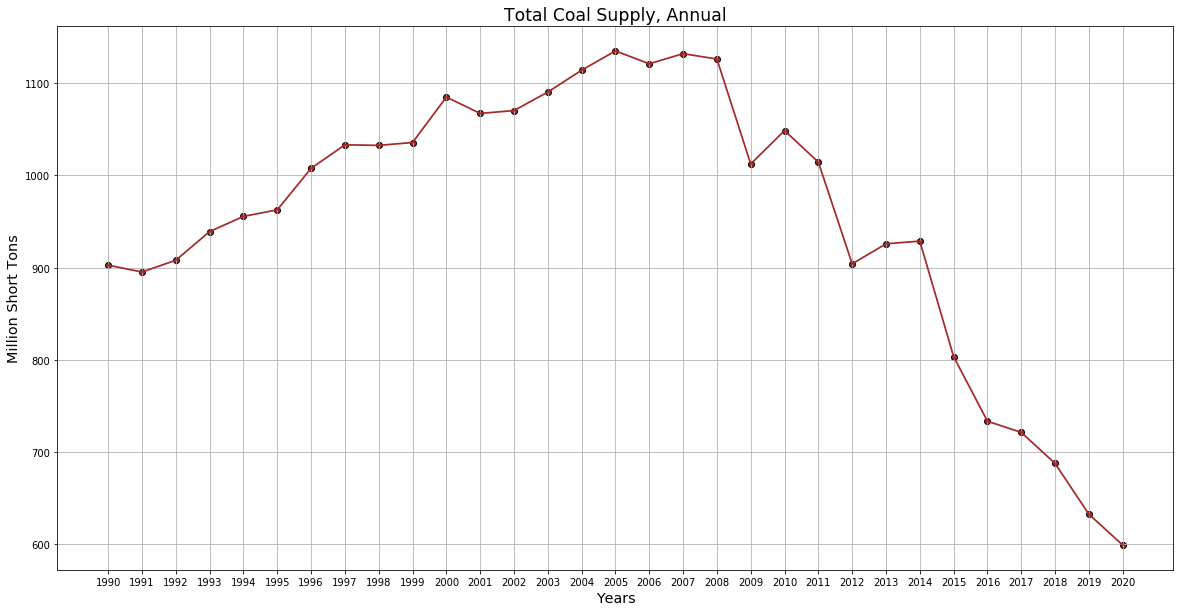

In [322]:
# Set the size of the figure to fit 30 years of data
plt.figure(figsize=(20,10))

# Create a visual for the data
plt.scatter(years, coal, color="brown", edgecolors="black")
plt.plot(years, coal, linewidth=1.75, color="brown")
plt.title("Total Coal Supply, Annual", fontsize="xx-large")
plt.ylabel("Million Short Tons", fontsize="x-large")
plt.xlabel("Years", fontsize="x-large")
plt.grid(True)

# Save Figure
plt.savefig("output/US Coal Consumption.png")

# display the figure
plt.show()

In [292]:
# Create Combined FossilFuel DataFrame using list of dictionaries method
fossilfuel_consumption_df = pd.DataFrame({
    'Year': years,
    'Petroleum (mmbpd)': petroleum,
    'Natural Gas (bcf/day)': natural_gas,
    'Coal (MMSt)': coal,
})
# Display DataFrame
fossilfuel_consumption_df.set_index("Year").head()

,Petroleum (mmbpd),Natural Gas (bcf/day),Coal (MMSt)
Year,,,
1990,16.989137,52.530288,902.768744
1991,16.713847,53.594703,895.303788
1992,17.032224,55.268382,908.113844
1993,17.236999,56.958472,939.165111
1994,17.718979,58.211229,955.626226


In [293]:
#  Export file as a CSV, without the Pandas index, but with the header
fossilfuel_consumption_df.to_csv("resources/FossilFuelConsumption.csv", index=False, header=True)

In [294]:
# Normalize values for the different types of fossil fuels
x = fossilfuel_consumption_df[['Petroleum (mmbpd)','Natural Gas (bcf/day)', 'Coal (MMSt)']].values.astype(float) #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
#df = pandas.DataFrame(x_scaled)
fossilfuel_consumption_normdf = pd.DataFrame(x_scaled, columns=['PetNorm', 'NatGasNorm', 'CoalNorm'])
fossilfuel_consumption_normdf.head()

,PetNorm,NatGasNorm,CoalNorm
0,0.063674,0.000000,0.566485
1,0.000000,0.034298,0.552554
2,0.073640,0.088229,0.576460
3,0.121004,0.142688,0.634407
4,0.232485,0.183056,0.665127


In [295]:
#  Export file as a CSV, without the Pandas index, but with the header
fossilfuel_consumption_normdf.to_csv("resources/FossilFuelConsumptionNormValues.csv", index=False, header=True)

In [296]:
# np.array(fossil_fuel_consumption_df['Petroleum (mmbpd)'])

In [297]:
x_lim = 0.25 * np.pi
x_axis = np.arange(0, x_lim, 1.0)
sin = np.sin(x_axis)

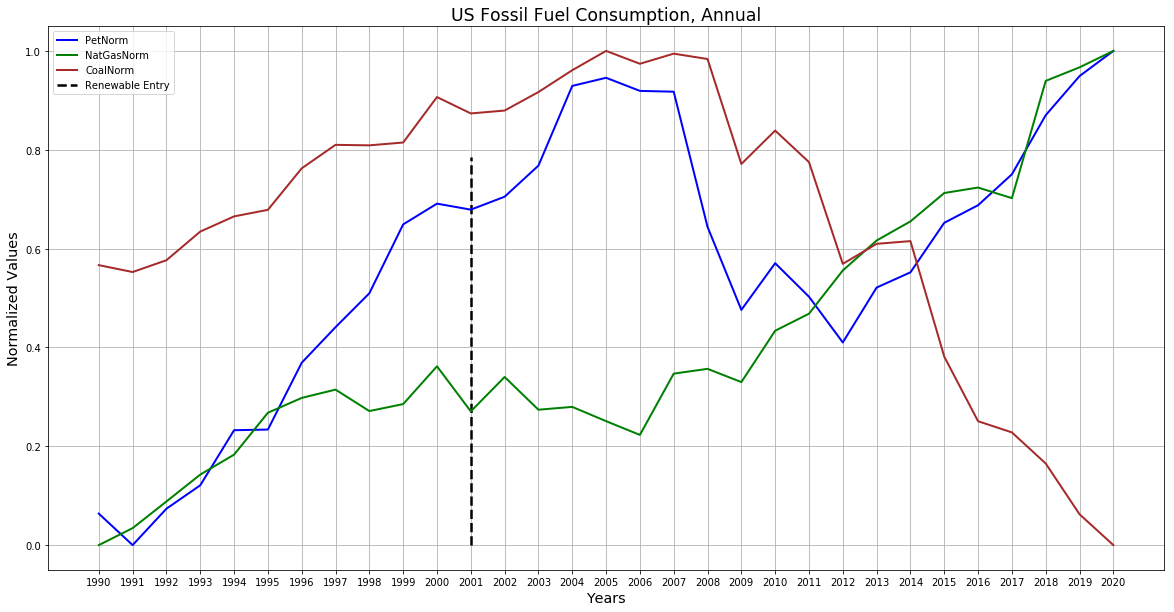

In [306]:
# US Fossil Fuel Consumption (1990 - Present)
plt.figure(figsize=(20,10))

# # Create a visual for the combined normalized fossil fuel data
plt.plot(years, fossilfuel_consumption_normdf['PetNorm'], color= "blue", linewidth=2.0)
plt.plot(years, fossilfuel_consumption_normdf['NatGasNorm'], color ="green", linewidth=2.0)
plt.plot(years, fossilfuel_consumption_normdf['CoalNorm'], color="brown", linewidth=2.0)
plt.title("US Fossil Fuel Consumption, Annual", fontsize="xx-large")
plt.ylabel("Normalized Values", fontsize="x-large")
plt.xlabel("Years", fontsize="x-large")
plt.legend(loc='best', frameon=True, fancybox=True, fontsize="x-large")
# lgnd.legendHandles[1]._sizes = 30
# lgnd.legendHandles[2]._sizes = 30
# lgnd.legendHandles[3]._sizes = 30
# plt.legend(handles=[world_avg, country_one], loc="best")
plt.grid(True)

# lgnd = plt.legend(fontsize="small", mode="Expanded", 
#                   numpoints=1, scatterpoints=1, 
#                   loc="best", title="City Types", 
#                   labelspacing=0.5)
# lgnd.legendHandles["Petroleum"]._sizes = [30]
# lgnd.legendHandles["Natural Gas"]._sizes = [30]
# lgnd.legendHandles["Coal"]._sizes = [30]

#save figure as a png
plt.savefig("output/US Fossil Fuel Consumption.png")

# # Display line for when renewables began to take off
plt.vlines(11, 0, x_lim, alpha=1.0, linestyles="--", label="Renewable Entry", linewidth=2.5, color="black")
plt.legend()

# display the figure
plt.show()


In [ ]:
# Create Combined FossilFuel consumption DataFrame using list of dictionaries method
fossilfuel_consumption_df = pd.DataFrame({
    'Year': years[0:31],
    'Petroleum (mmbpd)': petroleum[0:31],
    'Natural Gas (bcf/day)': natural_gas[0:31],
    'Coal (MMSt)': coal[0:31],
})

# Normalize values for the different types of fossil fuel consumption
x = fossilfuel_consumption_df[['Petroleum (mmbpd)','Natural Gas (bcf/day)', 'Coal (MMSt)', "Year"]].values.astype(float) #returns a numpy array
y= pd.DataFrame(x)
x = fossilfuel_consumption_df[['Petroleum (mmbpd)','Natural Gas (bcf/day)', 'Coal (MMSt)']].values.astype(float)

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
fossilfuel_consumption_normdf = pd.DataFrame(x_scaled, columns=['PetNorm', 'NatGasNorm', 'CoalNorm'])

ss= fossilfuel_consumption_normdf.join(y)

# drop extra columns
ss=ss.drop([0, 1, 2], axis=1)

# rename year index in dataframe to 'Year'
ss=ss.rename(columns = {3: "Year"})

# change year to integer for merge 
ss["Year"] = ss.Year.astype(int)

# change year to integer for merge
emissions_df["Year"] = emissions_df.Year.astype(int)

#make dataframe
ss=pd.DataFrame(ss)

# merge normalized consumption dataframe with emissions dataframe
emissions_consumption_df = pd.merge(emissions_df , ss , on='Year', how='inner')

# normalize all values in merged dataframe
xx=emissions_consumption_df[['Natural Gas Emissions','Petroleum Emissions', 'Coal Emissions', 'PetNorm', 'NatGasNorm', 'CoalNorm', "Year"]].values.astype(float) #returns a numpy array
yy= pd.DataFrame(xx)
xx = emissions_consumption_df[['Natural Gas Emissions','Petroleum Emissions', 'Coal Emissions', 'PetNorm', 'NatGasNorm', 'CoalNorm']].values.astype(float)

j_min_max_scaler = preprocessing.MinMaxScaler()
j_x_scaled = j_min_max_scaler.fit_transform(xx)
emissions_consumption_normdf = pd.DataFrame(j_x_scaled, columns=['Pet Consumption Norm', 'NatGas Consumption Norm', 'Coal Consumption Norm', 'Pet Emissions Norm', 'NatGas Emissions Norm', 'Coal Emissions Norm'])

j_ss= emissions_consumption_normdf.join(yy)

# drop unneccessary columns
j_ss=j_ss.drop([0, 1, 2, 3, 4, 5], axis=1)

# rename year index as 'year'
j_ss=j_ss.rename(columns = {6: "Year"})

# change year column to integer
j_ss["Year"] = j_ss.Year.astype(int)

# make a dataframe
j_ss=pd.DataFrame(j_ss)

j_ss.head()